<a href="https://colab.research.google.com/github/OjasTamhankar/Machine-Learning-Lab/blob/main/Experiment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Load Iris dataset
data = load_iris()
X = data.data
y_true = data.target  # Optional: true labels for comparison

print("Dataset shape:", X.shape)
print("First 5 rows:\n", X[:5])


Dataset shape: (150, 4)
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Set number of clusters (for Iris, 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Cluster labels
labels = kmeans.labels_
print("Cluster labels for first 10 samples:", labels[:10])


Cluster labels for first 10 samples: [1 2 2 2 1 1 1 1 2 2]


In [5]:
# Calculate silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 2))



Silhouette Score: 0.48


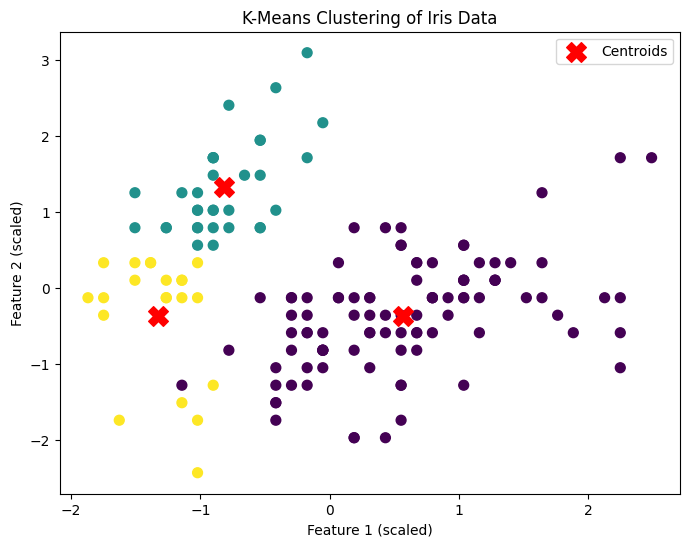

In [6]:
# Visualize using first two features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering of Iris Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()


In [7]:
# Compare clusters to true species
df = pd.DataFrame({'True Label': y_true, 'Cluster Label': labels})
print(df.head(10))


   True Label  Cluster Label
0           0              1
1           0              2
2           0              2
3           0              2
4           0              1
5           0              1
6           0              1
7           0              1
8           0              2
9           0              2
